In [11]:
import pandas as pd
import os
import subprocess
import glob
import uproot
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak
import mplhep as hep

In [2]:
def add_all_line(df, line):
    all_strings = ''
    for strings in df.iloc[line]:
        if type(strings) is str:
            all_strings += strings + '     '
    return all_strings


# resolved

In [10]:
cat_name = ['cat34FHlowpurity', 'cat34FHhighpurity', 'cat34SLlowpurity', 'cat34SLhighpurity']
mass_name=['MX250_MH125','MX260_MH125','MX270_MH125','MX280_MH125','MX300_MH125','MX320_MH125','MX350_MH125','MX400_MH125','MX450_MH125','MX500_MH125','MX550_MH125','MX600_MH125','MX650_MH125','MX700_MH125','MX750_MH125','MX800_MH125','MX850_MH125','MX900_MH125','MX1000_MH125']
getlimit=[]
Combinecommand=[]
txttoroot=[]
cd = []
for cat in cat_name:
    for mass in mass_name: 
        print(mass,cat)
        mass_dir =  mass
        FHSLcat_path="/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/"+mass_dir+"/Datacard_"+mass+"_2017_combineFHSL_"+cat+".txt"
        bbggcat_path="/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/"+mass_dir+"/Datacard_"+mass+"_2017_bbgg_"+cat+".txt"
        zzggcat_path="/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/"+mass_dir+"/Datacard_"+mass+"_2017_zzgg_"+cat+".txt"
        FHSLws_path="/eos/cms/store/group/phys_b2g/shsong/flashggws/cat34/2017/"+mass+"/ws_gghh_"+mass+"_2017_combineFHSL_"+cat
        bbggws_path="/eos/cms/store/group/phys_b2g/shsong/flashggws/cat34/2017/"+mass+"/ws_gghh_"+mass+"_2017_bbgg_"+cat
        zzggws_path="/eos/cms/store/group/phys_b2g/shsong/flashggws/cat34/2017/"+mass+"/ws_gghh_"+mass+"_2017_zzgg_"+cat
        FHSLsignalmodel= glob.glob(os.path.join(FHSLws_path, 'CMS-HGG_sigfit_packaged_*.root'))
        bbggsignalmodel= glob.glob(os.path.join(bbggws_path, 'CMS-HGG_sigfit_packaged_*.root'))
        zzggsignalmodel= glob.glob(os.path.join(zzggws_path, 'CMS-HGG_sigfit_packaged_*.root'))
        # print(FHSLws_path)
        # print(bbggws_path)
        if not os.path.exists(mass_dir):
            os.makedirs(mass_dir)
        destination_text_path = "/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/" + mass_dir + "/Datacard_" + mass + "_" + cat + ".txt"
        if os.path.exists(destination_text_path):
            os.remove(destination_text_path) 
        print(destination_text_path)
        # print(FHSLsignalmodel)
        # print(bbggsignalmodel)
        # print(zzggsignalmodel)
        if FHSLsignalmodel and not bbggsignalmodel and not zzggsignalmodel:
            print("FHSL",mass,cat)
            with open(FHSLcat_path, 'r') as source_file:
                        content = source_file.read()
            with open(destination_text_path, 'w') as destination_file:
                destination_file.write(content.replace("gghh_2017_hgg", "gghhWWgg_2017_hgg"))
        if FHSLsignalmodel and bbggsignalmodel and not zzggsignalmodel:
            print("FHSL and bbgg",mass,cat)
            with open(FHSLcat_path, 'r') as source_file:
                        content = source_file.read()
            with open(destination_text_path, 'w') as destination_file:
                destination_file.write(content.replace("gghh_2017_hgg", "gghhWWgg_2017_hgg"))
            separator = r'(?<!\*)\s+'

            df_FHSL = pd.read_table(FHSLcat_path, sep=separator, header=None, engine='python')
            df_FHSL = df_FHSL.replace('gghh_2017_hgg', 'gghhWWgg_2017_hgg')
            df_bbgg = pd.read_table(bbggcat_path, sep=separator, header=None, engine='python')
            df_bbgg = df_bbgg.replace('gghh_2017_hgg', 'gghhbbgg_2017_hgg')
            df_zzgg = pd.read_table(zzggcat_path, sep=separator, header=None, engine='python')
            df_zzgg = df_zzgg.replace('gghh_2017_hgg', 'gghhzzgg_2017_hgg')
            with open(destination_text_path, 'r') as file:
                lines = file.readlines()
                lines.insert(10, add_all_line(df_bbgg, 8).replace(" bbgg_"+cat+"_2017 "," combineFHSL_"+cat+"_2017 ") + "\n")
                lines[18]=(add_all_line(df_FHSL,15) + df_bbgg.iloc[15][1].replace("bbgg_"+cat+"_2017","combineFHSL_"+cat+"_2017")+ "\n")
                lines[19]=(add_all_line(df_FHSL,16) + df_bbgg.iloc[16][1]+ "\n")
                lines[20]=(add_all_line(df_FHSL,17) + str(int(df_bbgg.iloc[17][1])-1)+ "\n")
                lines[21]=(add_all_line(df_FHSL,18) + df_bbgg.iloc[18][1]+ "\n")
                lines[24]=(add_all_line(df_FHSL,20) + df_bbgg.iloc[20][2]+ "\n")
                lines[25]=(add_all_line(df_FHSL,21) + df_bbgg.iloc[21][2]+ "\n")
                lines[26]=(add_all_line(df_FHSL,22) + df_bbgg.iloc[22][2]+ "\n")
                lines[27]=(add_all_line(df_FHSL,23) + df_bbgg.iloc[23][2]+ "\n")
                lines[28]=(add_all_line(df_FHSL,24) + df_bbgg.iloc[24][2]+ "\n")
                lines[29]=(add_all_line(df_FHSL,25) + df_bbgg.iloc[25][2]+ "\n")
                lines[30]=(add_all_line(df_FHSL,26) + df_bbgg.iloc[26][2]+ "\n")
                lines[31]=(add_all_line(df_FHSL,27) + df_bbgg.iloc[27][2]+ "\n")
                lines[32]=(add_all_line(df_FHSL,28) + df_bbgg.iloc[28][2]+ "\n")
                lines[33]=(add_all_line(df_FHSL,29) + df_bbgg.iloc[29][2]+ "\n")
                lines[34]=(add_all_line(df_FHSL,30) + df_bbgg.iloc[30][2]+ "\n")
                lines[35]=(add_all_line(df_FHSL,31) + df_bbgg.iloc[31][2]+ "\n")
                lines[36]=(add_all_line(df_FHSL,32) + df_bbgg.iloc[32][2]+ "\n")
                lines[37]=(add_all_line(df_FHSL,33) + df_bbgg.iloc[33][2]+ "\n")
                lines[38]=(add_all_line(df_FHSL,34) + df_bbgg.iloc[34][2]+ "\n")
                lines[39]=(add_all_line(df_FHSL,35) + df_bbgg.iloc[35][2]+ "\n")
                lines[40]=(add_all_line(df_FHSL,36) + df_bbgg.iloc[36][2]+ "\n")
                lines[41]=(add_all_line(df_FHSL,37) + df_bbgg.iloc[37][2]+ "\n")
                lines[42]=(add_all_line(df_FHSL,38) + df_bbgg.iloc[38][2]+ "\n")
                # lines[43]=(add_all_line(df_FHSL,39) + df_bbgg.iloc[39][2]+ "\n")
                lines[44]=(add_all_line(df_FHSL,40) + df_bbgg.iloc[40][2]+ "\n")
                lines[45]=(add_all_line(df_FHSL,41) + df_bbgg.iloc[41][2]+ "\n")
                lines[46]=(add_all_line(df_FHSL,42) + df_bbgg.iloc[42][2]+ "\n")
                lines[47]=(add_all_line(df_FHSL,43) + df_bbgg.iloc[43][2]+ "\n")
                # lines[48]=(add_all_line(df_FHSL,44) + df_bbgg.iloc[44][2]+ "\n")
                # lines[49]=(add_all_line(df_FHSL,45) + df_bbgg.iloc[45][2]+ "\n")
                
                with open(destination_text_path, 'w') as file:
                    file.writelines(lines)
        if FHSLsignalmodel and bbggsignalmodel and zzggsignalmodel:
            print("FHSL, bbgg, zzgg ",mass,cat)
            with open(FHSLcat_path, 'r') as source_file:
                        content = source_file.read()
            with open(destination_text_path, 'w') as destination_file:
                destination_file.write(content.replace("gghh_2017_hgg", "gghhWWgg_2017_hgg"))
            separator = r'(?<!\*)\s+'

            df_FHSL = pd.read_table(FHSLcat_path, sep=separator, header=None, engine='python')
            df_FHSL = df_FHSL.replace('gghh_2017_hgg', 'gghhWWgg_2017_hgg')
            df_bbgg = pd.read_table(bbggcat_path, sep=separator, header=None, engine='python')
            df_bbgg = df_bbgg.replace('gghh_2017_hgg', 'gghhbbgg_2017_hgg')
            df_zzgg = pd.read_table(zzggcat_path, sep=separator, header=None, engine='python')
            df_zzgg = df_zzgg.replace('gghh_2017_hgg', 'gghhzzgg_2017_hgg')
            with open(destination_text_path, 'r') as file:
                lines = file.readlines()
                lines.insert(10, add_all_line(df_bbgg, 8).replace(" bbgg_"+cat+"_2017 "," combineFHSL_"+cat+"_2017 ") + "\n")
                lines[18]=(add_all_line(df_FHSL,15) + df_bbgg.iloc[15][1].replace("bbgg_"+cat+"_2017","combineFHSL_"+cat+"_2017")+"     "+df_zzgg.iloc[15][1].replace("zzgg_"+cat+"_2017","combineFHSL_"+cat+"_2017")+ "\n")
                lines[19]=(add_all_line(df_FHSL,16) + df_bbgg.iloc[16][1]+"     "+df_zzgg.iloc[16][1]+ "\n")
                lines[20]=(add_all_line(df_FHSL,17) + str(int(df_bbgg.iloc[17][1])-1)+"     " +str(int(df_bbgg.iloc[17][1])-2)+ "\n")
                lines[21]=(add_all_line(df_FHSL,18) + df_bbgg.iloc[18][1]+"     "+df_zzgg.iloc[18][1]+ "\n")
                lines[24]=(add_all_line(df_FHSL,20) + df_bbgg.iloc[20][2]+"     "+df_zzgg.iloc[20][2]+ "\n")
                lines[25]=(add_all_line(df_FHSL,21) + df_bbgg.iloc[21][2]+"     "+df_zzgg.iloc[21][2]+ "\n")
                lines[26]=(add_all_line(df_FHSL,22) + df_bbgg.iloc[22][2]+"     "+df_zzgg.iloc[22][2]+ "\n")
                lines[27]=(add_all_line(df_FHSL,23) + df_bbgg.iloc[23][2]+"     "+df_zzgg.iloc[23][2]+ "\n")
                lines[28]=(add_all_line(df_FHSL,24) + df_bbgg.iloc[24][2]+"     "+df_zzgg.iloc[24][2]+ "\n")
                lines[29]=(add_all_line(df_FHSL,25) + df_bbgg.iloc[25][2]+"     "+df_zzgg.iloc[25][2]+ "\n")
                lines[30]=(add_all_line(df_FHSL,26) + df_bbgg.iloc[26][2]+"     "+df_zzgg.iloc[26][2]+ "\n")
                lines[31]=(add_all_line(df_FHSL,27) + df_bbgg.iloc[27][2]+"     "+df_zzgg.iloc[27][2]+ "\n")
                lines[32]=(add_all_line(df_FHSL,28) + df_bbgg.iloc[28][2]+"     "+df_zzgg.iloc[28][2]+ "\n")
                lines[33]=(add_all_line(df_FHSL,29) + df_bbgg.iloc[29][2]+"     "+df_zzgg.iloc[29][2]+ "\n")
                lines[34]=(add_all_line(df_FHSL,30) + df_bbgg.iloc[30][2]+"     "+df_zzgg.iloc[30][2]+ "\n")
                lines[35]=(add_all_line(df_FHSL,31) + df_bbgg.iloc[31][2]+"     "+df_zzgg.iloc[31][2]+ "\n")
                lines[36]=(add_all_line(df_FHSL,32) + df_bbgg.iloc[32][2]+"     "+df_zzgg.iloc[32][2]+ "\n")
                lines[37]=(add_all_line(df_FHSL,33) + df_bbgg.iloc[33][2]+"     "+df_zzgg.iloc[33][2]+ "\n")
                lines[38]=(add_all_line(df_FHSL,34) + df_bbgg.iloc[34][2]+"     "+df_zzgg.iloc[34][2]+ "\n")
                lines[39]=(add_all_line(df_FHSL,35) + df_bbgg.iloc[35][2]+"     "+df_zzgg.iloc[35][2]+ "\n")
                lines[40]=(add_all_line(df_FHSL,36) + df_bbgg.iloc[36][2]+"     "+df_zzgg.iloc[36][2]+ "\n")
                lines[41]=(add_all_line(df_FHSL,37) + df_bbgg.iloc[37][2]+"     "+df_zzgg.iloc[37][2]+ "\n")
                lines[42]=(add_all_line(df_FHSL,38) + df_bbgg.iloc[38][2]+"     "+df_zzgg.iloc[38][2]+ "\n")
                # lines[43]=(add_all_line(df_FHSL,39) + df_bbgg.iloc[39][2]+"     "+df_zzgg.iloc[39][2]+ "\n")
                lines[44]=(add_all_line(df_FHSL,40) + df_bbgg.iloc[40][2]+"     "+df_zzgg.iloc[40][2]+ "\n")
                lines[45]=(add_all_line(df_FHSL,41) + df_bbgg.iloc[41][2]+"     "+df_zzgg.iloc[41][2]+ "\n")
                lines[46]=(add_all_line(df_FHSL,42) + df_bbgg.iloc[42][2]+"     "+df_zzgg.iloc[42][2]+ "\n")
                lines[47]=(add_all_line(df_FHSL,43) + df_bbgg.iloc[43][2]+"     "+df_zzgg.iloc[43][2]+ "\n")
                # lines[48]=(add_all_line(df_FHSL,44) + df_bbgg.iloc[44][2]+"     "+df_zzgg.iloc[44][2]+ "\n")
                # lines[49]=(add_all_line(df_FHSL,45) + df_bbgg.iloc[45][2]+"     "+df_zzgg.iloc[45][2]+ "\n")
                lines.insert(10, add_all_line(df_zzgg, 8).replace(" zzgg_"+cat+"_2017 "," combineFHSL_"+cat+"_2017 ") + "\n")
                with open(destination_text_path, 'w') as file:
                    file.writelines(lines)
        if FHSLsignalmodel and zzggsignalmodel and not bbggsignalmodel:
            print("FHSL and zzgg",mass,cat)
            with open(FHSLcat_path, 'r') as source_file:
                        content = source_file.read()
            with open(destination_text_path, 'w') as destination_file:
                destination_file.write(content.replace("gghh_2017_hgg", "gghhWWgg_2017_hgg"))
            separator = r'(?<!\*)\s+'

            df_FHSL = pd.read_table(FHSLcat_path, sep=separator, header=None, engine='python')
            df_FHSL = df_FHSL.replace('gghh_2017_hgg', 'gghhWWgg_2017_hgg')
            df_bbgg = pd.read_table(bbggcat_path, sep=separator, header=None, engine='python')
            df_bbgg = df_bbgg.replace('gghh_2017_hgg', 'gghhbbgg_2017_hgg')
            df_zzgg = pd.read_table(zzggcat_path, sep=separator, header=None, engine='python')
            df_zzgg = df_zzgg.replace('gghh_2017_hgg', 'gghhzzgg_2017_hgg')
            with open(destination_text_path, 'r') as file:
                lines = file.readlines()
                lines.insert(10, add_all_line(df_zzgg, 8).replace(" zzgg_"+cat+"_2017 "," combineFHSL_"+cat+"_2017 ") + "\n")
                lines[18]=(add_all_line(df_FHSL,15) + df_zzgg.iloc[15][1].replace("zzgg_"+cat+"_2017","combineFHSL_"+cat+"_2017")+ "\n")
                lines[19]=(add_all_line(df_FHSL,16) + df_zzgg.iloc[16][1]+ "\n")
                lines[20]=(add_all_line(df_FHSL,17) + str(int(df_zzgg.iloc[17][1])-1)+ "\n")
                lines[21]=(add_all_line(df_FHSL,18) + df_zzgg.iloc[18][1]+ "\n")
                lines[24]=(add_all_line(df_FHSL,20) + df_zzgg.iloc[20][2]+ "\n")
                lines[25]=(add_all_line(df_FHSL,21) + df_zzgg.iloc[21][2]+ "\n")
                lines[26]=(add_all_line(df_FHSL,22) + df_zzgg.iloc[22][2]+ "\n")
                lines[27]=(add_all_line(df_FHSL,23) + df_zzgg.iloc[23][2]+ "\n")
                lines[28]=(add_all_line(df_FHSL,24) + df_zzgg.iloc[24][2]+ "\n")
                lines[29]=(add_all_line(df_FHSL,25) + df_zzgg.iloc[25][2]+ "\n")
                lines[30]=(add_all_line(df_FHSL,26) + df_zzgg.iloc[26][2]+ "\n")
                lines[31]=(add_all_line(df_FHSL,27) + df_zzgg.iloc[27][2]+ "\n")
                lines[32]=(add_all_line(df_FHSL,28) + df_zzgg.iloc[28][2]+ "\n")
                lines[33]=(add_all_line(df_FHSL,29) + df_zzgg.iloc[29][2]+ "\n")
                lines[34]=(add_all_line(df_FHSL,30) + df_zzgg.iloc[30][2]+ "\n")
                lines[35]=(add_all_line(df_FHSL,31) + df_zzgg.iloc[31][2]+ "\n")
                lines[36]=(add_all_line(df_FHSL,32) + df_zzgg.iloc[32][2]+ "\n")
                lines[37]=(add_all_line(df_FHSL,33) + df_zzgg.iloc[33][2]+ "\n")
                lines[38]=(add_all_line(df_FHSL,34) + df_zzgg.iloc[34][2]+ "\n")
                lines[39]=(add_all_line(df_FHSL,35) + df_zzgg.iloc[35][2]+ "\n")
                lines[40]=(add_all_line(df_FHSL,36) + df_zzgg.iloc[36][2]+ "\n")
                lines[41]=(add_all_line(df_FHSL,37) + df_zzgg.iloc[37][2]+ "\n")
                lines[42]=(add_all_line(df_FHSL,38) + df_zzgg.iloc[38][2]+ "\n")
                # lines[43]=(add_all_line(df_FHSL,39) + df_zzgg.iloc[39][2]+ "\n")
                lines[44]=(add_all_line(df_FHSL,40) + df_zzgg.iloc[40][2]+ "\n")
                lines[45]=(add_all_line(df_FHSL,41) + df_zzgg.iloc[41][2]+ "\n")
                lines[46]=(add_all_line(df_FHSL,42) + df_zzgg.iloc[42][2]+ "\n")
                lines[47]=(add_all_line(df_FHSL,43) + df_zzgg.iloc[43][2]+ "\n")
                # lines[48]=(add_all_line(df_FHSL,44) + df_zzgg.iloc[44][2]+ "\n")
                # lines[49]=(add_all_line(df_FHSL,45) + df_zzgg.iloc[45][2]+ "\n")
                with open(destination_text_path, 'w') as file:
                    file.writelines(lines)

MX250_MH125 cat34FHlowpurity
/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX250_MH125/Datacard_MX250_MH125_cat34FHlowpurity.txt
FHSL, bbgg, zzgg  MX250_MH125 cat34FHlowpurity
MX260_MH125 cat34FHlowpurity
/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX260_MH125/Datacard_MX260_MH125_cat34FHlowpurity.txt
FHSL, bbgg, zzgg  MX260_MH125 cat34FHlowpurity
MX270_MH125 cat34FHlowpurity
/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX270_MH125/Datacard_MX270_MH125_cat34FHlowpurity.txt
FHSL, bbgg, zzgg  MX270_MH125 cat34FHlowpurity
MX280_MH125 cat34FHlowpurity
/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX280_MH125/Datacard_MX280_MH125_cat34FHlowpurity.txt
FHSL, bbgg, zzgg  MX280_MH125 cat34FHlowpurity
MX300_MH125 cat34FHlowpurity
/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX300_MH125

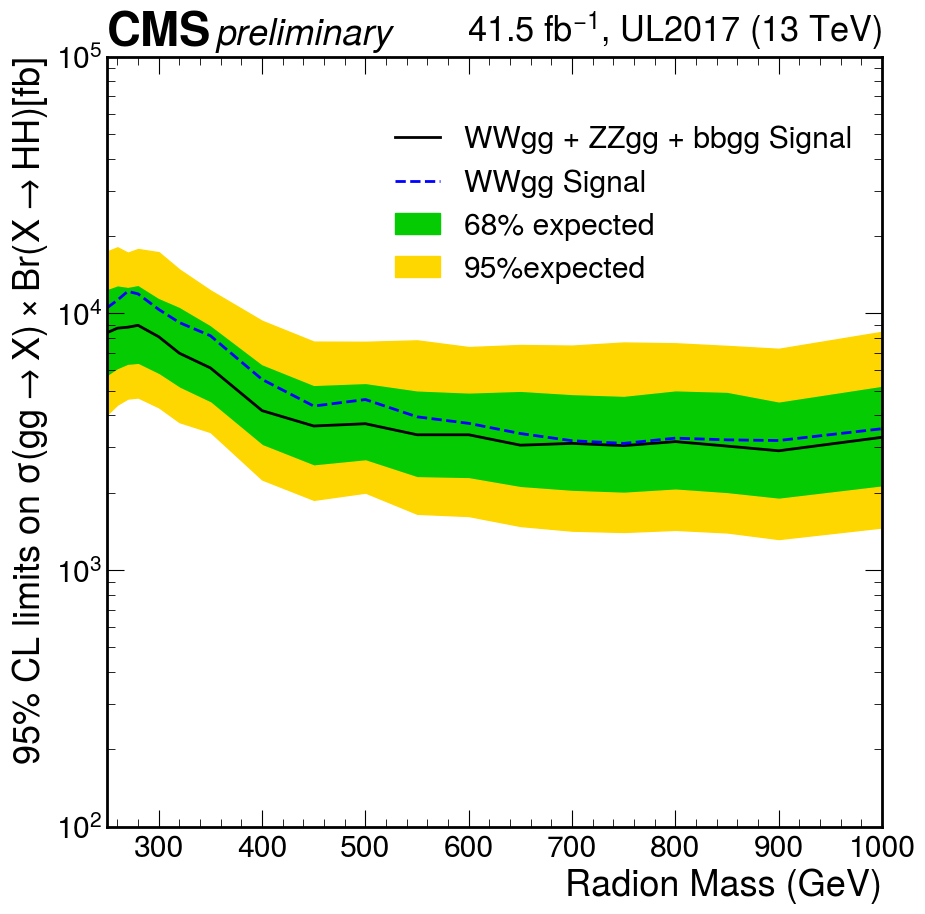

In [27]:
M250_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX250_MH125/higgsCombineMX250_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M250_cat34 = M250_events_cat34["limit"].arrays(['limit']).limit*100
M260_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX260_MH125/higgsCombineMX260_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M260_cat34 = M260_events_cat34["limit"].arrays(['limit']).limit*100
M270_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX270_MH125/higgsCombineMX270_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M270_cat34 = M270_events_cat34["limit"].arrays(['limit']).limit*100
M280_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX280_MH125/higgsCombineMX280_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M280_cat34 = M280_events_cat34["limit"].arrays(['limit']).limit*100
M300_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX300_MH125/higgsCombineMX300_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M300_cat34 = M300_events_cat34["limit"].arrays(['limit']).limit*100
M320_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX320_MH125/higgsCombineMX320_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M320_cat34 = M320_events_cat34["limit"].arrays(['limit']).limit*100
M350_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX350_MH125/higgsCombineMX350_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M350_cat34 = M350_events_cat34["limit"].arrays(['limit']).limit*100
M400_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX400_MH125/higgsCombineMX400_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M400_cat34 = M400_events_cat34["limit"].arrays(['limit']).limit*100
M450_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX450_MH125/higgsCombineMX450_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M450_cat34 = M450_events_cat34["limit"].arrays(['limit']).limit*100
M500_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX500_MH125/higgsCombineMX500_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M500_cat34 = M500_events_cat34["limit"].arrays(['limit']).limit*100
M550_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX550_MH125/higgsCombineMX550_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M550_cat34 = M550_events_cat34["limit"].arrays(['limit']).limit*100
M600_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX600_MH125/higgsCombineMX600_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M600_cat34 = M600_events_cat34["limit"].arrays(['limit']).limit*100
M650_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX650_MH125/higgsCombineMX650_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M650_cat34 = M650_events_cat34["limit"].arrays(['limit']).limit*100
M700_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX700_MH125/higgsCombineMX700_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M700_cat34 = M700_events_cat34["limit"].arrays(['limit']).limit*100
M750_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX750_MH125/higgsCombineMX750_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M750_cat34 = M750_events_cat34["limit"].arrays(['limit']).limit*100
M800_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX800_MH125/higgsCombineMX800_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M800_cat34 = M800_events_cat34["limit"].arrays(['limit']).limit*100
M850_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX850_MH125/higgsCombineMX850_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M850_cat34 = M850_events_cat34["limit"].arrays(['limit']).limit*100
M900_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX900_MH125/higgsCombineMX900_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M900_cat34 = M900_events_cat34["limit"].arrays(['limit']).limit*100
M1000_events_cat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX1000_MH125/higgsCombineMX1000_MH125_2017_cat34all.AsymptoticLimits.mH125.root")
M1000_cat34 = M1000_events_cat34["limit"].arrays(['limit']).limit*100
M250_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX250_MH125/higgsCombineMX250_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M250_wwggcat34 = M250_events_wwggcat34["limit"].arrays(['limit']).limit*100
M260_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX260_MH125/higgsCombineMX260_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M260_wwggcat34 = M260_events_wwggcat34["limit"].arrays(['limit']).limit*100
M270_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX270_MH125/higgsCombineMX270_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M270_wwggcat34 = M270_events_wwggcat34["limit"].arrays(['limit']).limit*100
M280_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX280_MH125/higgsCombineMX280_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M280_wwggcat34 = M280_events_wwggcat34["limit"].arrays(['limit']).limit*100
M300_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX300_MH125/higgsCombineMX300_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M300_wwggcat34 = M300_events_wwggcat34["limit"].arrays(['limit']).limit*100
M320_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX320_MH125/higgsCombineMX320_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M320_wwggcat34 = M320_events_wwggcat34["limit"].arrays(['limit']).limit*100
M350_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX350_MH125/higgsCombineMX350_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M350_wwggcat34 = M350_events_wwggcat34["limit"].arrays(['limit']).limit*100
M400_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX400_MH125/higgsCombineMX400_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M400_wwggcat34 = M400_events_wwggcat34["limit"].arrays(['limit']).limit*100
M450_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX450_MH125/higgsCombineMX450_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M450_wwggcat34 = M450_events_wwggcat34["limit"].arrays(['limit']).limit*100
M500_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX500_MH125/higgsCombineMX500_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M500_wwggcat34 = M500_events_wwggcat34["limit"].arrays(['limit']).limit*100
M550_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX550_MH125/higgsCombineMX550_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M550_wwggcat34 = M550_events_wwggcat34["limit"].arrays(['limit']).limit*100
M600_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX600_MH125/higgsCombineMX600_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M600_wwggcat34 = M600_events_wwggcat34["limit"].arrays(['limit']).limit*100
M650_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX650_MH125/higgsCombineMX650_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M650_wwggcat34 = M650_events_wwggcat34["limit"].arrays(['limit']).limit*100
M700_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX700_MH125/higgsCombineMX700_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M700_wwggcat34 = M700_events_wwggcat34["limit"].arrays(['limit']).limit*100
M750_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX750_MH125/higgsCombineMX750_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M750_wwggcat34 = M750_events_wwggcat34["limit"].arrays(['limit']).limit*100
M800_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX800_MH125/higgsCombineMX800_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M800_wwggcat34 = M800_events_wwggcat34["limit"].arrays(['limit']).limit*100
M850_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX850_MH125/higgsCombineMX850_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M850_wwggcat34 = M850_events_wwggcat34["limit"].arrays(['limit']).limit*100
M900_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX900_MH125/higgsCombineMX900_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M900_wwggcat34 = M900_events_wwggcat34["limit"].arrays(['limit']).limit*100
M1000_events_wwggcat34 = uproot.open("/afs/cern.ch/user/s/shsong/CMSSW_10_6_20/src/flashggFinalFit/Datacard/split/2017fixbbgg/MX1000_MH125/higgsCombineMX1000_MH125_2017_cat34.AsymptoticLimits.mH125.root")
M1000_wwggcat34 = M1000_events_wwggcat34["limit"].arrays(['limit']).limit*100



hep.style.use(hep.style.CMS)
hep.cms.label("preliminary", data=True, year='UL2017', lumi=41.5)   
# set figure size
plt.rcParams["figure.figsize"] = (20,20)
allcat_values = [250,260,270,280,300,320,350,400,450,500,550,600,650,700,750,800,850,900,1000]
plt.plot(allcat_values, [M250_cat34[2],M260_cat34[2],M270_cat34[2],M280_cat34[2],M300_cat34[2],M320_cat34[2],M350_cat34[2],M400_cat34[2],M450_cat34[2],M500_cat34[2],M550_cat34[2],M600_cat34[2],M650_cat34[2],M700_cat34[2],M750_cat34[2],M800_cat34[2],M850_cat34[2],M900_cat34[2],M1000_cat34[2]],color='black', linewidth=2,linestyle='-', label='WWgg + ZZgg + bbgg Signal')#'Asymptotic Limits CLs expected'
plt.plot(allcat_values, [M250_wwggcat34[2],M260_wwggcat34[2],M270_wwggcat34[2],M280_wwggcat34[2],M300_wwggcat34[2],M320_wwggcat34[2],M350_wwggcat34[2],M400_wwggcat34[2],M450_wwggcat34[2],M500_wwggcat34[2],M550_wwggcat34[2],M600_wwggcat34[2],M650_wwggcat34[2],M700_wwggcat34[2],M750_wwggcat34[2],M800_wwggcat34[2],M850_wwggcat34[2],M900_wwggcat34[2],M1000_wwggcat34[2]],color='blue', linewidth=2,linestyle='--', label='WWgg Signal')#'Asymptotic Limits CLs expected'

# 创建连接线之间的中间面积区域并设置为绿色
# 68% confidence interval
plt.fill_between(allcat_values, [M250_cat34[1],M260_cat34[1],M270_cat34[1],M280_cat34[1],M300_cat34[1],M320_cat34[1],M350_cat34[1],M400_cat34[1],M450_cat34[1],M500_cat34[1],M550_cat34[1],M600_cat34[1],M650_cat34[1],M700_cat34[1],M750_cat34[1],M800_cat34[1],M850_cat34[1],M900_cat34[1],M1000_cat34[1]], [M250_cat34[3],M260_cat34[3],M270_cat34[3],M280_cat34[3],M300_cat34[3],M320_cat34[3],M350_cat34[3],M400_cat34[3],M450_cat34[3],M500_cat34[3],M550_cat34[3],M600_cat34[3],M650_cat34[3],M700_cat34[3],M750_cat34[3],M800_cat34[3],M850_cat34[3],M900_cat34[3],M1000_cat34[3]], color='#04cb02', alpha=1, label= r'68% expected')#label= r'±1 std. deviation')

# 95% confidence interval
plt.fill_between(allcat_values, [M250_cat34[0],M260_cat34[0],M270_cat34[0],M280_cat34[0],M300_cat34[0],M320_cat34[0],M350_cat34[0],M400_cat34[0],M450_cat34[0],M500_cat34[0],M550_cat34[0],M600_cat34[0],M650_cat34[0],M700_cat34[0],M750_cat34[0],M800_cat34[0],M850_cat34[0],M900_cat34[0],M1000_cat34[0]],[M250_cat34[1],M260_cat34[1],M270_cat34[1],M280_cat34[1],M300_cat34[1],M320_cat34[1],M350_cat34[1],M400_cat34[1],M450_cat34[1],M500_cat34[1],M550_cat34[1],M600_cat34[1],M650_cat34[1],M700_cat34[1],M750_cat34[1],M800_cat34[1],M850_cat34[1],M900_cat34[1],M1000_cat34[1]], color='gold', alpha=1, label=r'95%expected')#label= r'±2 std. deviation')
plt.fill_between(allcat_values,  [M250_cat34[3],M260_cat34[3],M270_cat34[3],M280_cat34[3],M300_cat34[3],M320_cat34[3],M350_cat34[3],M400_cat34[3],M450_cat34[3],M500_cat34[3],M550_cat34[3],M600_cat34[3],M650_cat34[3],M700_cat34[3],M750_cat34[3],M800_cat34[3],M850_cat34[3],M900_cat34[3],M1000_cat34[3]],  [M250_cat34[4],M260_cat34[4],M270_cat34[4],M280_cat34[4],M300_cat34[4],M320_cat34[4],M350_cat34[4],M400_cat34[4],M450_cat34[4],M500_cat34[4],M550_cat34[4],M600_cat34[4],M650_cat34[4],M700_cat34[4],M750_cat34[4],M800_cat34[4],M850_cat34[4],M900_cat34[4],M1000_cat34[4]], color='gold', alpha=1)

plt.xlabel(r'Radion Mass (GeV)')
plt.ylabel(r'95% CL limits on $\sigma(gg\to X)\times Br(X\to HH)[fb]$')
# set x axis range
plt.xlim(250,1000)

# set log scale
plt.yscale('log')
# set y limit
plt.ylim(100,100000)
# put legend outside of the plot box in right
# plt.legend(loc='upper right', bbox_to_anchor=(1.8, 1.0))
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.95))
